# ELM-FATES/CLM-FATES SP mode comparison

CLM-FATES sp mode case settings:
- hlm tag: `ctsm5.1.dev056`
- fates tag: `sci.1.47.0_api.17.0.0`
- compset: `2000_DATM%CRUv7_CLM50%FATES_SICE_SOCN_SROF_SGLC_SWAV`
- resolution: `f45_f45_mg37`

ELM-FATES sp mode case settings:
- hlm tag: `v2.0.0-rc3-281-g864095fbbe` (based on Ryan's PR)
- fates tag: `sci.1.47.0_api.17.0.0`
- compset: `2000_DATM%CRU_ELM%BGC-FATES_SICE_SOCN_SROF_SGLC_SWAV`
- resolution: `f45_f45`

History variables included:

`hist_fincl1       = 'NPP','GPP','BTRAN','H2OSOI','TLAI','TSAI','HTOP','ED_NPATCHES','AREA_PLANT','LEAFC',
                    'PFTnindivs','PFTbiomass','PFTleafbiomass','PFTcrownarea'`

## Import libraries

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx

## Load history output data

In [3]:
clm = xr.open_dataset('sp_mode-elm_compare-cru.fates-sci.1.47.0_api.17.0.0-ctsm5.1.dev056-C7761d5bb-Ff32d831f.intel.clm2.h0.2004.nc')
elm = xr.open_dataset('spmode-clm_compare-cru1.fates-sci.1.47.0_api.17.0.0-v2.0.0-C864095fbbe-Ff32d831f.intel.elm.h0.2004.nc')

## TLAI

In [4]:
clm.TLAI.dims

('time', 'lat', 'lon')

In [5]:
clm.TLAI.time.size

12

In [8]:
tlai_clm = clm.TLAI
tlai_elm = elm.TLAI

Text(0.5, 1.0, 'Difference')

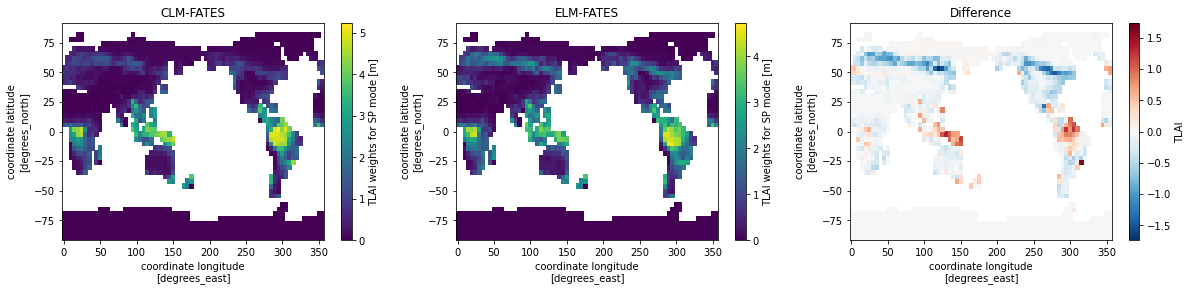

In [52]:
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_clm.isel(time=tstop_idx).plot(ax=ax1)
tlai_elm.isel(time=tstop_idx).plot(ax=ax2)
(tlai_clm-tlai_elm).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM-FATES')
ax2.set_title('ELM-FATES')
ax3.set_title('Difference')

## TSAI

In [10]:
tsai_clm = clm.TSAI
tsai_elm = elm.TSAI

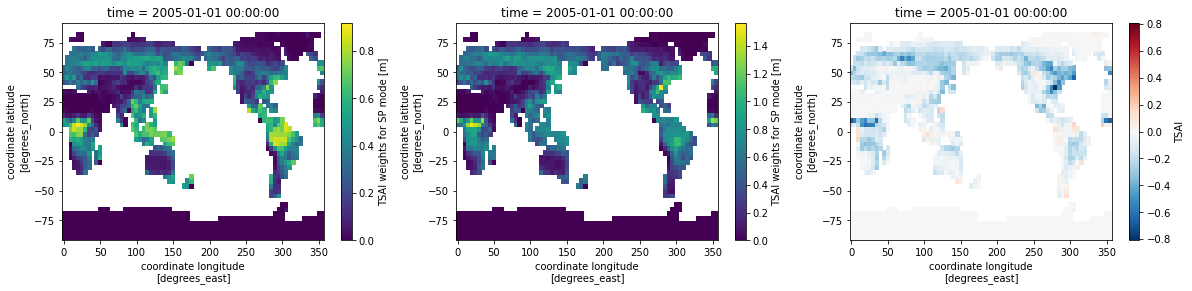

In [20]:
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tsai_clm.isel(time=tstop_idx).plot(ax=ax1)
tsai_elm.isel(time=tstop_idx).plot(ax=ax2)
(tsai_clm-tsai_elm).isel(time=tstop_idx).plot(ax=ax3)

## HTOP

In [12]:
htop_clm = clm.HTOP
htop_elm = elm.HTOP

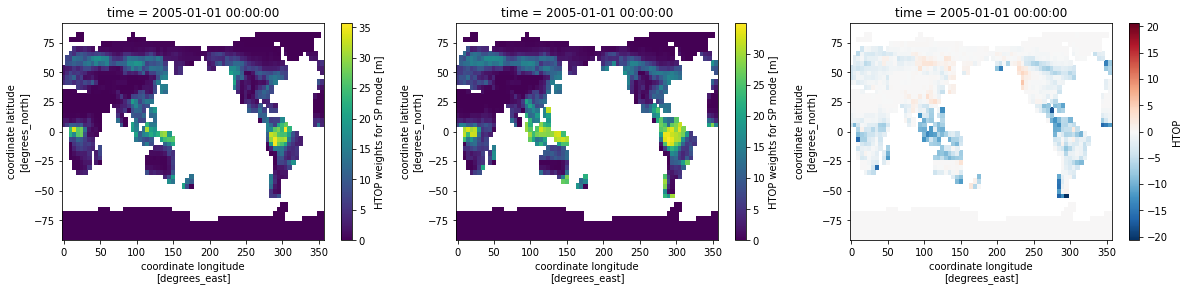

In [45]:
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
htop_clm.isel(time=tstop_idx).plot(ax=ax1)
htop_elm.isel(time=tstop_idx).plot(ax=ax2)
(htop_clm-htop_elm).isel(time=tstop_idx).plot(ax=ax3)

## GPP

In [16]:
gpp_clm = clm.GPP
gpp_elm = elm.GPP

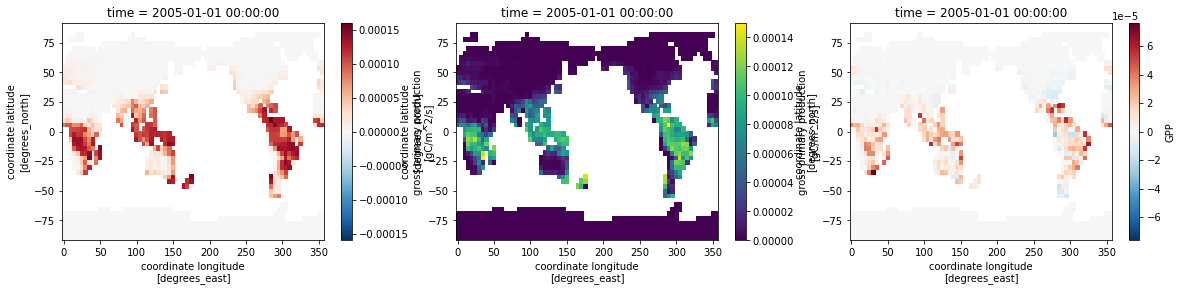

In [18]:
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_clm.isel(time=tstop_idx).plot(ax=ax1)
gpp_elm.isel(time=tstop_idx).plot(ax=ax2)
(gpp_clm-gpp_elm).isel(time=tstop_idx).plot(ax=ax3)

## PFTnindivs

In [22]:
clm.PFTnindivs.dims

('time', 'fates_levpft', 'lat', 'lon')

In [30]:
clm_nind = clm.PFTnindivs
elm_nind = elm.PFTnindivs

In [31]:
figs = (16,8)
tstop_idx = 11

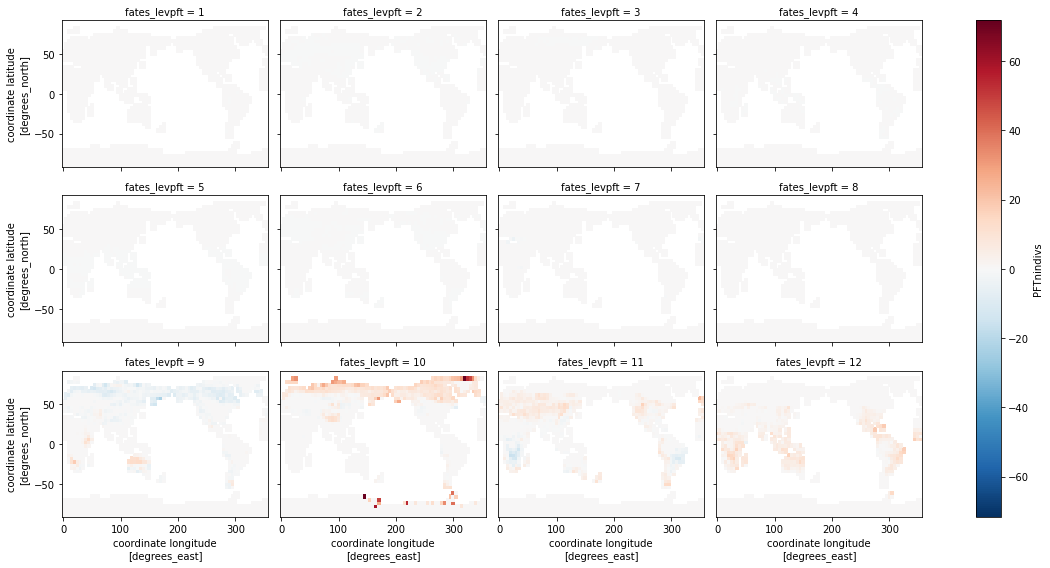

In [32]:
(clm_nind-elm_nind).isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

## PFTbiomass

In [34]:
clm.PFTbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [36]:
clm_pbm = clm.PFTbiomass
elm_pbm = elm.PFTbiomass

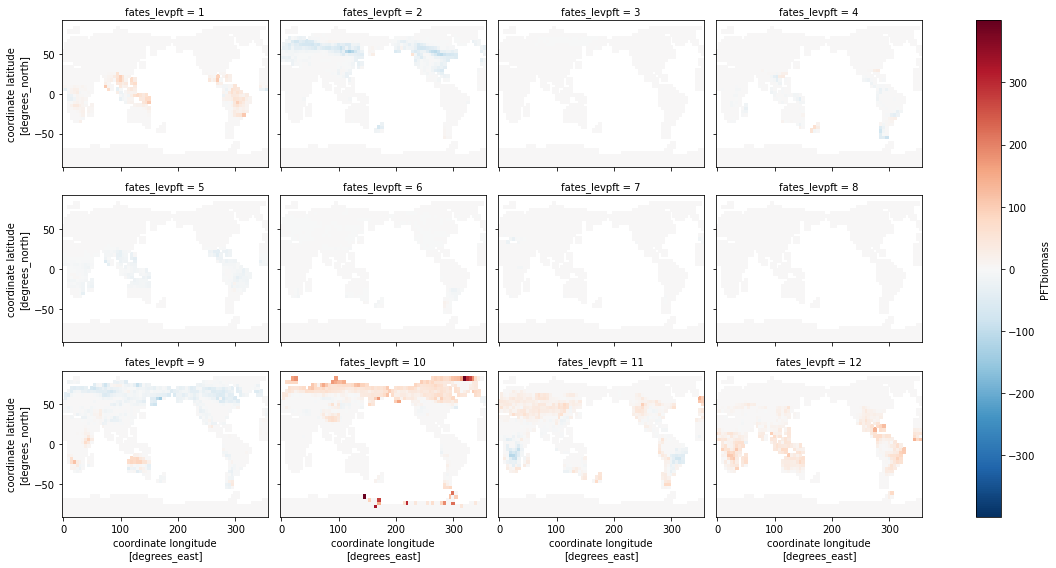

In [37]:
(clm_pbm - elm_pbm).isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

## PFTleafbiomass

In [38]:
clm.PFTleafbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [39]:
clm_plbm = clm.PFTleafbiomass
elm_plbm = elm.PFTleafbiomass

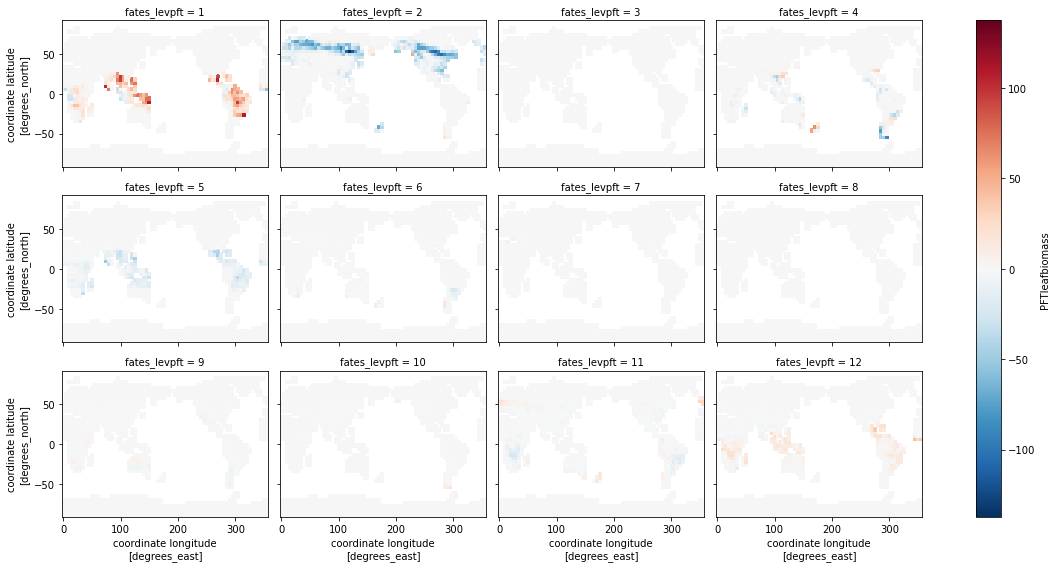

In [40]:
(clm_plbm - elm_plbm).isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

## Crown Area

In [41]:
clm.PFTcrownarea.dims

('time', 'fates_levpft', 'lat', 'lon')

In [42]:
clm_ca = clm.PFTcrownarea
elm_ca = elm.PFTcrownarea

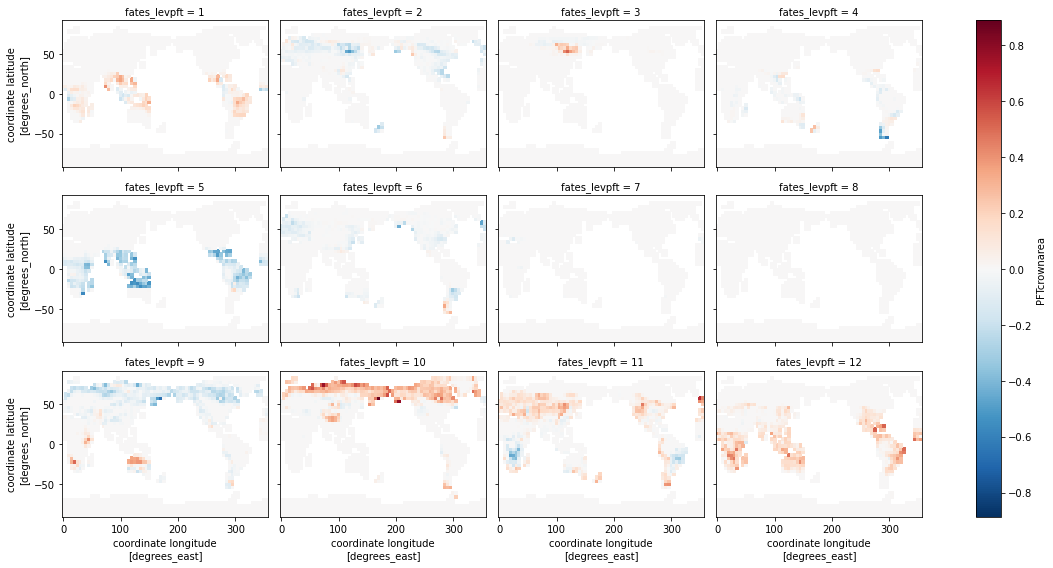

In [43]:
(clm_ca - elm_ca).isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)